In [1]:
import pandas as pd

PATH       = 'https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz'
df         = pd.read_csv(PATH, usecols=['Date', 'Fatalities'], parse_dates=['Date'], index_col='Date').dropna()
df_monthly = df.resample('M').sum().sort_index()
df_monthly.head()

,Fatalities
Date,
1908-09-30,1.0
1908-10-31,0.0
1908-11-30,0.0
1908-12-31,0.0
1909-01-31,0.0


<Axes: xlabel='Date'>

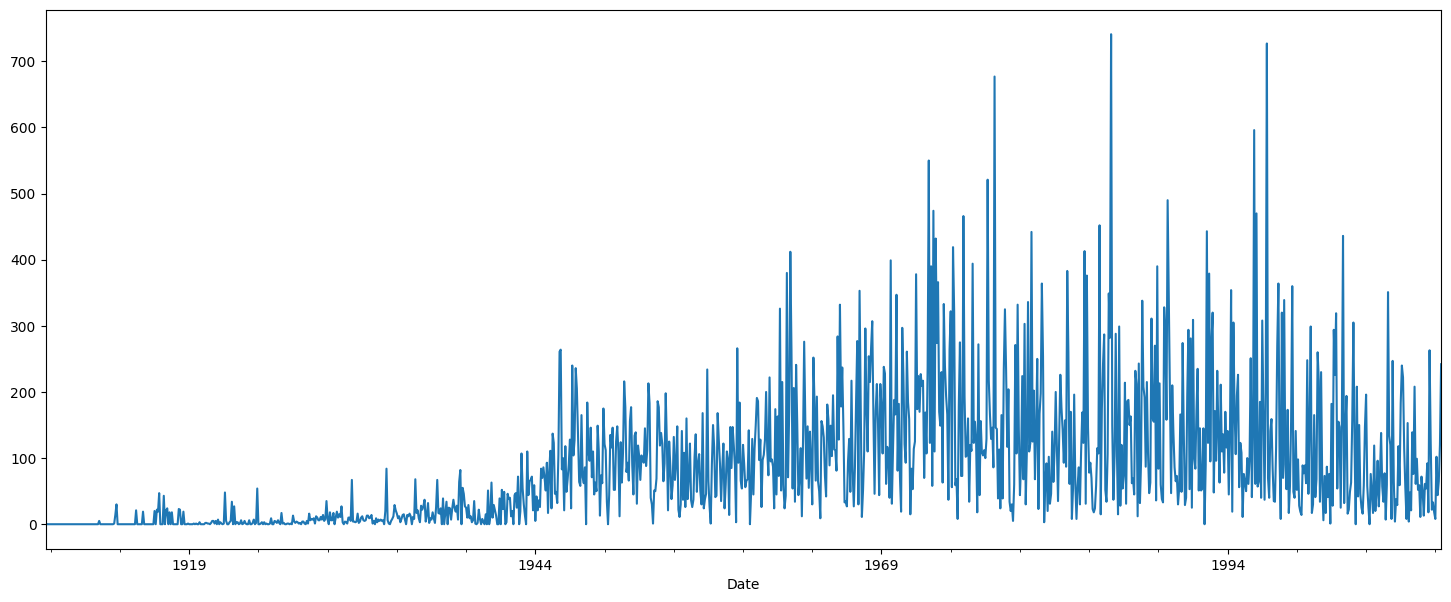

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,7))
df_monthly['Fatalities'].plot()

In [3]:
df_monthly.rolling(3).mean()

,Fatalities
Date,
1908-09-30,NaN
1908-10-31,NaN
1908-11-30,0.333333
1908-12-31,0.000000
1909-01-31,0.000000
...,...
2009-02-28,42.666667
2009-03-31,51.333333
2009-04-30,70.333333


In [6]:
from ipywidgets import interact

@interact(window_size=range(12, 121, 12)) # @interact(window_size=(12, 121, 12)) -> Utilização de 'slider' (passando uma tupla)
def rolling_mean(window_size):
  plt.figure(figsize=(18,7))
  df_monthly['Fatalities'].rolling(window_size).mean().plot()
  plt.show()

interactive(children=(Dropdown(description='window_size', options=(12, 24, 36, 48, 60, 72, 84, 96, 108, 120), …